In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Gem5-Sheet2.csv")

In [3]:
data

,Attributes,H_1k,P -1k,H-64k,P-64k,H-8MB,P-8MB,H-16MB,P-16MB
0,L2 cache Access,78968,99451,2124,194432,976,655824,972,786793
1,CPU cycles,50067922,14577309152,1058629,9644120189,191867,9620767495,188911,9636121491


In [4]:
data.rename(columns = {'P -1k':'P_1K', 'H_1k':'H_1K', 
                    'H-64k':'H_64K', 'P-64k':'P_64K','H-8MB':'H_8MB','P-8MB':'P_8MB',
                    'H-16MB':'H_16MB', 'P-16MB':'P_16MB'}, inplace = True) 

In [5]:
data

,Attributes,H_1K,P_1K,H_64K,P_64K,H_8MB,P_8MB,H_16MB,P_16MB
0,L2 cache Access,78968,99451,2124,194432,976,655824,972,786793
1,CPU cycles,50067922,14577309152,1058629,9644120189,191867,9620767495,188911,9636121491


In [6]:
plt.rcParams['figure.figsize'] = (12,9)
workloads = ['1K','64K','8M','16M']

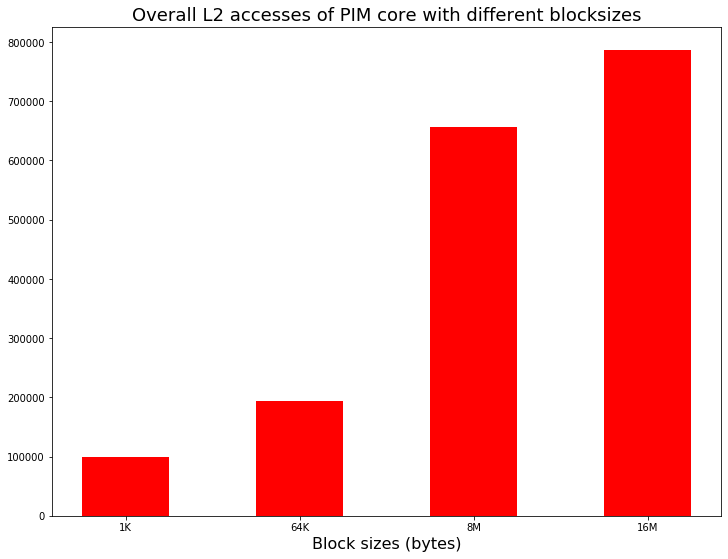

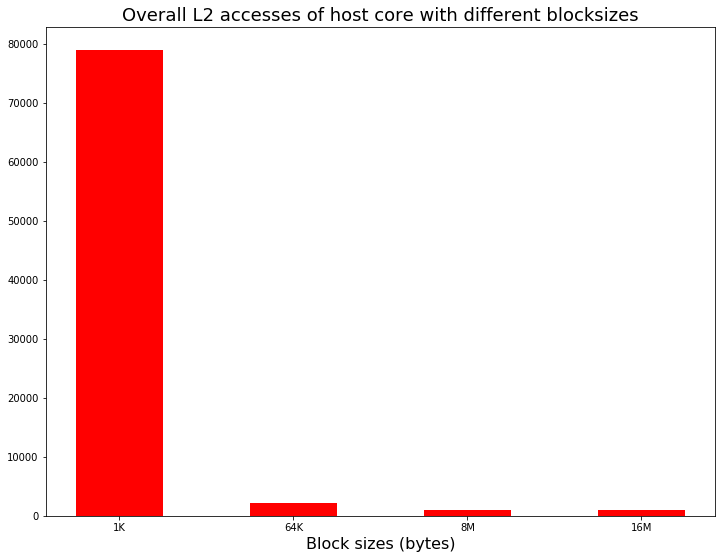

In [7]:
li = data.loc[data["Attributes"]=="L2 cache Access"]
for index, rows in li.iterrows(): 
    l2_cache = [rows.H_1K, rows.P_1K, rows.H_64K, rows.P_64K, 
                  rows.H_8MB, rows.P_8MB, rows.H_16MB, rows.P_16MB]
    
plt.bar(workloads, l2_cache[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 accesses of PIM core with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.show()
plt.savefig('testplot.png')

plt.bar(workloads, l2_cache[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 accesses of host core with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.show()

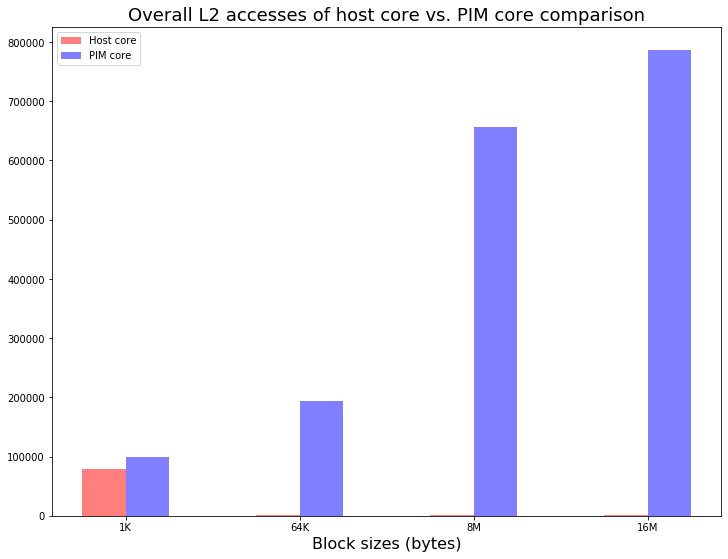

In [8]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, l2_cache[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], l2_cache[1::2], width, alpha=0.5, color='blue') 

ax.set_title('Overall L2 accesses of host core vs. PIM core comparison', fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['Host core','PIM core'], loc='upper left')
plt.xlabel('Block sizes (bytes)',fontsize=16)
# plt.grid()
plt.show()

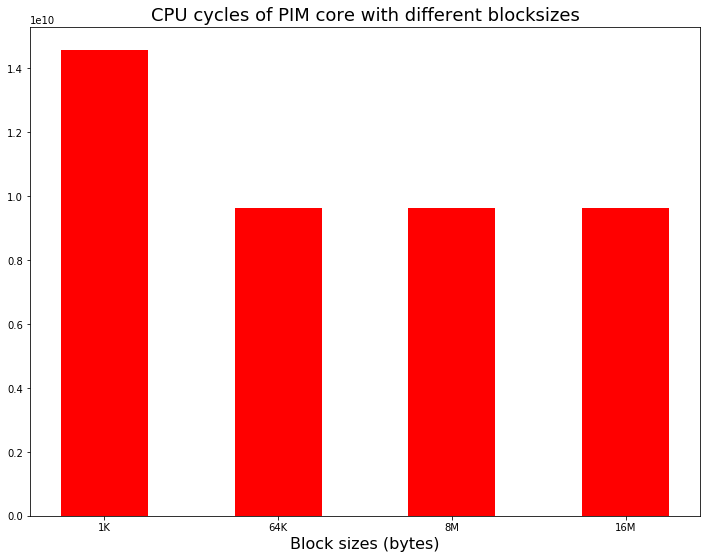

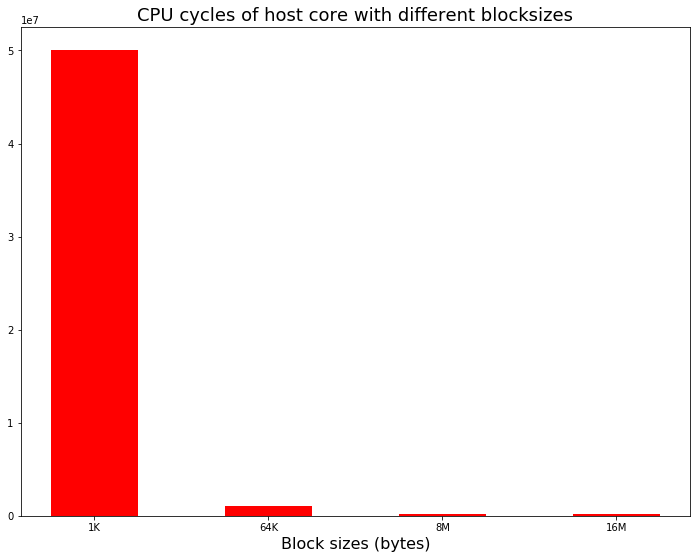

In [9]:
li = data.loc[data["Attributes"]=="CPU cycles"]
for index, rows in li.iterrows(): 
    cpu_cycles = [rows.H_1K, rows.P_1K, rows.H_64K, rows.P_64K, 
                  rows.H_8MB, rows.P_8MB, rows.H_16MB, rows.P_16MB]
    
plt.bar(workloads, cpu_cycles[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("CPU cycles of PIM core with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.show()

plt.bar(workloads, cpu_cycles[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("CPU cycles of host core with different blocksizes", fontsize=18) 
plt.xlabel('Block sizes (bytes)', fontsize=16)
plt.show()

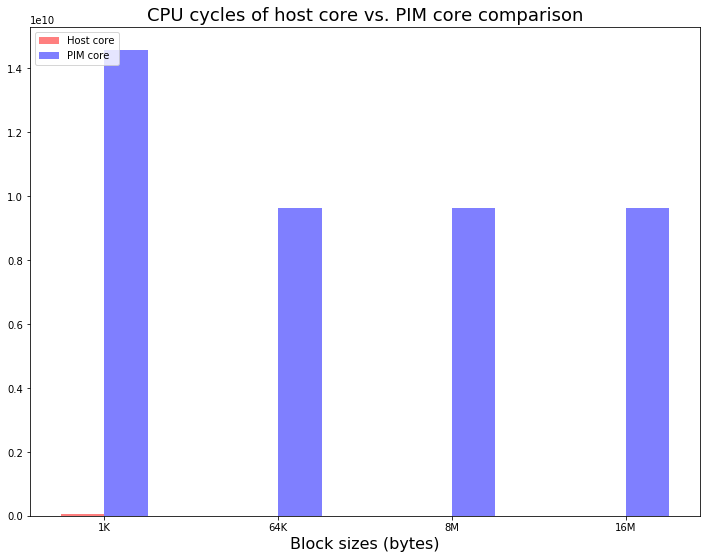

In [10]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, cpu_cycles[::2], width, alpha=0.5, color='red') 
plt.bar([p + width for p in pos], cpu_cycles[1::2], width, alpha=0.5, color='blue') 

ax.set_title('CPU cycles of host core vs. PIM core comparison', fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['Host core','PIM core'], loc='upper left')
plt.xlabel('Block sizes (bytes)', fontsize=16)
# plt.grid()
plt.show()